In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('/content/IPL2016.csv')

In [4]:
data.head()

,Unnamed: 0,overall_sr,won
0,1,168.817204,1
1,2,165.432099,0
2,3,121.568627,0
3,4,149.541284,1
4,5,151.898734,0


In [5]:
X = data[['overall_sr']].values
y = data['won'].values

In [6]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [7]:
intercept = model.intercept_[0]
coef = model.coef_[0][0]

In [8]:
print(f"Intercept: {intercept}")
print(f"Coefficient: {coef}")

Intercept: -7.505103426433888
Coefficient: 0.05227294728710764


In [9]:
def logistic_function(x):
    return 1 / (1 + np.exp(-(intercept + coef * x)))

In [10]:
strike_rate_range = np.linspace(X.min(), X.max(), 300)

In [11]:
probabilities = logistic_function(strike_rate_range)

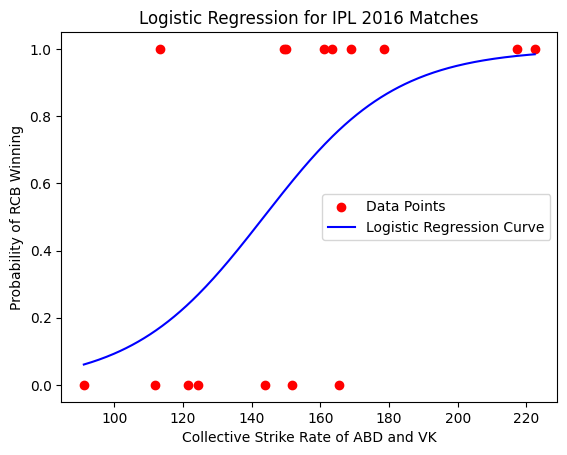

In [12]:
plt.scatter(X, y, color='red', label='Data Points')
plt.plot(strike_rate_range, probabilities, color='blue', label='Logistic Regression Curve')
plt.xlabel('Collective Strike Rate of ABD and VK')
plt.ylabel('Probability of RCB Winning')
plt.legend()
plt.title('Logistic Regression for IPL 2016 Matches')
plt.show()

In [13]:
def predict_probability(strike_rate):
    return logistic_function(strike_rate)

In [14]:
strike_rate_example = 150
predicted_probability = predict_probability(strike_rate_example)
print(f"Predicted probability of winning for strike rate {strike_rate_example}: {predicted_probability}")

Predicted probability of winning for strike rate 150: 0.5831793325019774
